# Coeficiente de Lyapunov
En los anteriores archivos hemos visto que efectivamente el **Atractor de Lorenz** es sensible a pequeñas perturbaciones sobre las condicionales (de la misma forma para los parámetros $\sigma$, $\rho$ y $\beta$). ¿Habrá alguna forma de medir esa sensibilidad? ¿Habrá alguna manera de, sin resolver el sistema o sin hacer perturbaciones, podemos decretar que es un sistema complejo? O al menos, ¿habrá alguna forma de decretarlo?

Este concepto nace de la mente Aleksandr Lyapunov a finales del siglo XIX, en el contexto de la estabilidad de sistemas dinámicos. Su trabajo sentó las bases para el estudio moderno del caos y la teoría de sistemas complejos. Más tarde, con el desarrollo de la computación y el análisis numérico, los exponentes de Lyapunov se convirtieron en una herramienta fundamental para caracterizar el comportamiento caótico en sistemas físicos, meteorológicos y matemáticos, como el famoso *atractor de Lorenz* descubierto en 1963. 

**Pero ¿Qué es el coeficiente de Lyapunov?** El coeficiente de Lyapunov mide la sensibilidad a las condiciones iniciales en sistemas dinámicos, como el atractor de Lorenz. Específicamente, cuantifica la tasa de divergencia exponencial entre trayectorias cercanas: si el coeficiente es positivo, pequeñas diferencias iniciales se amplifican rápidamente, lo que indica comportamiento caótico. Para el atractor de Lorenz, el mayor exponente de Lyapunov es positivo, lo que confirma la naturaleza caótica del sistema y la imposibilidad de predecir su evolución a largo plazo.

La fórmula para calcular el coeficiente de Lyapunov es:
$$
\lambda = \lim_{t \to \infty} \frac{1}{t} \ln \left( \frac{|\delta(t)|}{|\delta_0|} \right)
$$

donde $\delta_0$ es la distancia inicial entre dos trayectorias y $\delta(t)$ es la distancia en el tiempo $t$. Si $\lambda > 0$, el sistema es caótico.


Como $\lim{t \to \infty}$ y eso está *muy lejos*, vamos a ver como evoluciona $\lambda$ para diferentes tiempos para ver si tiende a algun valor en específico.

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

Definimos las funciones que vamos a necesitar para el programa: el sistema de Lorentz y el método de runge Kutta

In [ ]:
def metodo_Rk(f,t0,X0,t_final,h):

    n = round((t_final-t0)/h)
    t=np.linspace(t0,t_final,n+1)
    m = len(X0)
    x = np.zeros((n+1, m))
    x[0] = X0
    for i in range(n):
        k1 = h * f(x[i])
        k2 = h * f(x[i] + k1/2)
        k3 = h * f(x[i] + k2/2)
        k4 = h * f(x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / float(6)
    return t, x

def sistema_lorentz(x,sigma,beta,rho):
 
    dx_dt=sigma*(x[1]-x[0])
    dy_dt=x[0]*(rho-x[2])-x[1]
    dz_dt=x[0]*x[1]-beta*x[2]
    return np.array([dx_dt,dy_dt,dz_dt])

def comparador_matriz(tol,matriz,parada):
    filas, columnas = matriz.shape
    j=0
    while j<columnas:
        for i in range(filas):
             if abs(matriz[i,j]) >=tol:
                parada[j]=i
                if j==2:
                    return(parada)
                break
        j=j+1
        
def modulo(matriz,t):
    filas=len(t)
    vector=np.zeros(len(t))
    for i in range(filas):
             vector[i]=m.sqrt(matriz[i,0]**2 + matriz[i,1]**2 + matriz[i,2]**2)
    return vector

Definimos nuestras condiciones iniciales, tiempos y la pequeñas perturbación que sentirá mi sistemas $\delta=10^{-5}$


In [ ]:
sigma = 10 
beta = 8/3    
rho = 28     
X01=np.array([0.,1.,0.])#Condicion inicial.
perturbacion=1e-5
X02=np.array([0.,1 + perturbacion, 0.])#Condicion inicial con una leve perturbación de 1*10^-5
t0=0
t_final=[200, 400, 600, 800, 1000] #Tiempos de simulación
h=1

Calculamos las diez trayectorias

In [ ]:
delta0 = np.mod(np.array(X01 - X02))

valores ={'Tiempo':[], 'x':[], 'y':[], 'z':[]}
valores_perturbacion = {'Tiempo':[], 'x':[], 'y':[], 'z':[]}

for i in range(len(t_final)):
     t=[]
     x=[]
     t, x = metodo_Rk(lambda x: sistema_lorentz(x, sigma, beta, rho), t0, X01, t_final[i])
     for j in range(len(t)):
          valores['Tiempo'].append(t[j]) 
          valores['x'].append(x[j, 0])
          valores['y'].append(x[j, 1])
          valores['z'].append(x[j, 2])
     t=[]
     x=[]
     t, x = metodo_Rk(lambda x: sistema_lorentz(x, sigma, beta, rho), t0, X02, t_final[i])
     for j in range(len(t)):
          valores_perturbacion['Tiempo'].append(t[j])
          valores_perturbacion['x'].append(x[j, 0])
          valores_perturbacion['y'].append(x[j, 1])
          valores_perturbacion['z'].append(x[j, 2])

[36827 36757 36861]


Ploteamos los resultados calculados y comparamos a partir del vector parada.

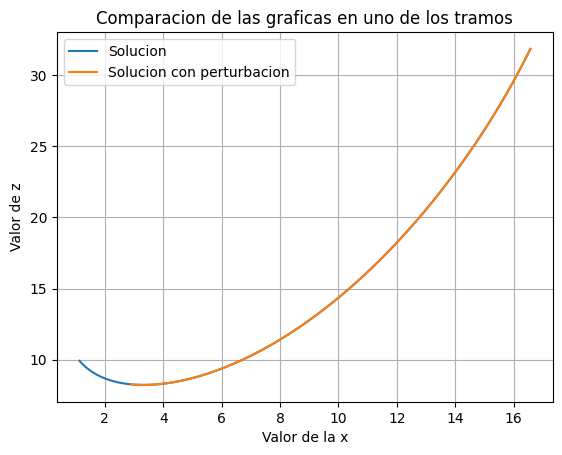

In [6]:
plt.plot(x[parada[0]-100 : parada[0]+200,0],x[parada[0]-100 : parada[0]+200,2], label='Solucion')
plt.plot(y[parada[0] : parada[0]+200,0],y[parada[0] : parada[0]+200,2], label='Solucion con perturbacion')
plt.xlabel('Valor de la x')
plt.ylabel('Valor de z')
plt.title('Comparacion de las graficas en uno de los tramos')
plt.legend()
plt.grid(True)
plt.show()


Hacemos una regresión lineal con la ecuación $\delta(t)$=$\delta _0 *e^{t*\lambda}$.
Para hacerlo cálculo el módulo de cada punto haciendo un nuevo vector que sera $\delta (t)$, hago el logaritmo neperaino para hacer lineal la ecuación y hago una regresión lineal.

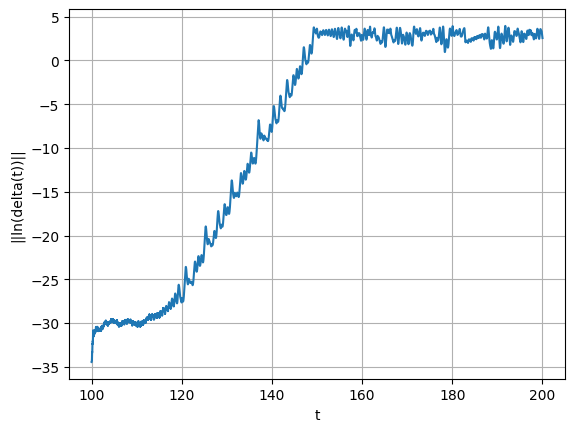

In [7]:

deltaln=np.zeros(len(t))
delta=modulo(z,t)
for i in range(len(t)):
    deltaln[i]=np.log(delta[i])
# y=mx + n m=0.9 y n = 1e-7:.........: y=ln(|delta(t)|) x=t


x=np.linspace(100,200,1000)
plt.plot(t,deltaln)
plt.xlabel('t')
plt.ylabel('||ln(delta(t))||')
plt.grid(True)
plt.show()

Vemos que la pendiente que en la gráfica hay unos puntos que estables los cuales no aportan nada nuevo. Por ello, calcularemos para que t la distancia entre dos puntos de los graficos anteriores se emepeieza a volver estable. La fórmula dada para el tiempo de horizonte depende de $\lambda$, por tanto no podremos utilizarla. (Lo haré a ojo hasta que descubra como hacerlo mejor)

La pendiente es: 0.8890303551951625
La ordenada en el origen es:  -131.76605967658233 que al hacer el logaritmo neperiano sale:  5.9528834586708236e-58
La correlación de la regresión:  0.9910352729949565
2.589996032799775


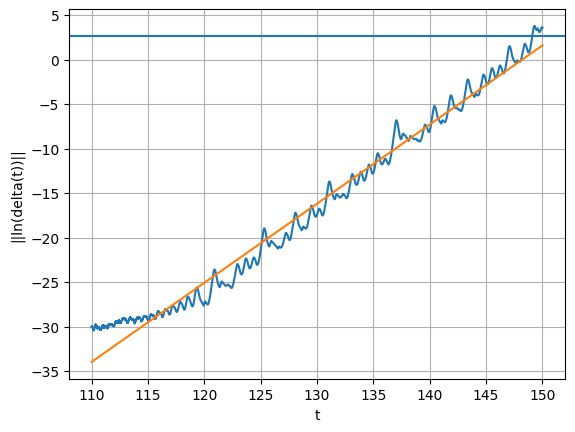

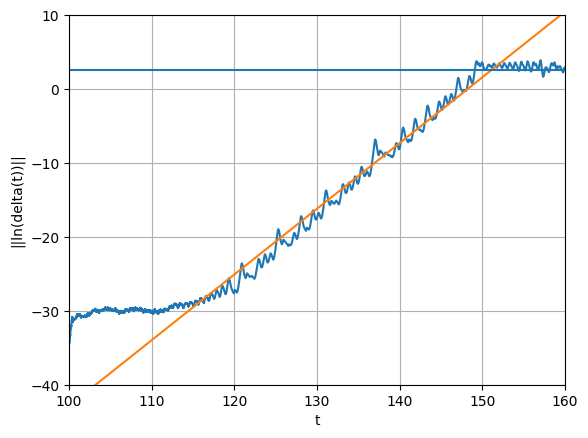

In [8]:
slope1, intercept1, r1, p1, std_err1 = stats.linregress(t[10000 : 50000], deltaln[10000 : 50000])
print('La pendiente es:',slope1)
print('La ordenada en el origen es: ', intercept1, 'que al hacer el logaritmo neperiano sale: ', np.exp(intercept1))
print('La correlación de la regresión: ', r1)
thorizonte=1/slope1*np.log(10**(-14)/perturbacion)
print(thorizonte) 
x=np.linspace(110,150,1000)
plt.plot(t[10000 : 50000], deltaln[10000 : 50000])
plt.plot(x,slope1*x+intercept1)
plt.axhline(thorizonte)
plt.xlabel('t')
plt.ylabel('||ln(delta(t))||')
plt.grid(True)
plt.show()



x=np.linspace(100,200,1000)
plt.plot(t,deltaln)
plt.plot(x,slope1*x+intercept1)
plt.axhline(thorizonte)
plt.xlabel('t')
plt.ylabel('||ln(delta(t))||')
plt.xlim(100,160)
plt.ylim(-40,10)
plt.grid(True)
plt.show()

Calcularemos de otra forma la más precisa la pendiente y además podremos sacar para que iteración es óptimo hacer la iteración. Dado que el vector media está al reves, de mayor a menor, he tenido que buscar el primer mínimo de las ultimas iteraciones, osea, ha tenido que ser el tercer mínimo.

In [25]:
LV=int(len(t)/1000) #Longitud de mi vector de medias
media= np.zeros(LV)
for l in range(LV):
    k=0
    suma=0
    while k<=1000:
        for i in (len(t)-l*1000-1,len(t)-l*1000-1001):
            k=k+1
            suma=suma+deltaln[i]
            if k==1000:
                media[l]=suma/k
#Creamos un algoritmo para ver la iteración máxima antes de la estabilidad
mayor=0 #Para el siguiente algoritmo y ver cual es la diferencia máxima
valoritermax=0 #donde se guarda la iteracion maxima que estamos buscando
for k in range(1,LV-1):
    if (media[k]-abs(media[k+1]))>mayor:
        mayor = media[k]-media[k+1]
        valoritermax=len(t)-k*1000
#Creamos un vector marcadores para que guarde las iteraciones minimas.
iteraciones=np.zeros(LV+1) #iteraciones
marcadores=np.zeros(LV+1) #marcadores de hasta donde van los for

k=0
marcadores[k]=int((-valoritermax+len(t))/1000)
v=False

menor=media[int((len(t)-valoritermax)/1000)+1]- media[int((len(t)-valoritermax)/1000+2)] #Es algo para comprobar una de las medidas

while v != True:

    for i in range(int(marcadores[k]),LV-1):
        if abs(media[i+1]-media[i])<menor:
            menor=abs(media[i+1]-media[i])
            iteraciones[k]=len(t)-(i+1)*1000
    slope1, intercept1, r1, p1, std_err1 = stats.linregress(t[int(iteraciones[k+1]) : valoritermax], deltaln[int(iteraciones[k+1]) : valoritermax])

    if slope1 >=0.9 and slope1<= 0.91:
        v==True
    else:
        k=k+1
        marcadores[k]=int((-marcadores+len(t))/1000+1)
        menor=menor+1  

0.7256843518834611


TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
LV=int(len(t)/1000) #Longitud de mi vector de medias
media= np.zeros(LV)
for l in range(LV):
    k=0
    suma=0
    while k<=1000:
        for i in (len(t)-l*1000-1,len(t)-l*1000-1001):
            k=k+1
            suma=suma+deltaln[i]
            if k==1000:
                media[l]=suma/k
mayor=0 #Para el siguiente algoritmo y ver cual es la diferencia máxima
valoritermax=0#donde se guarda la iteracion maxima que estamos buscando

for k in range(1,LV-1):
    if (media[k]-abs(media[k+1]))>mayor:
        mayor = media[k]-media[k+1]
        valoritermax=len(t)-k*1000
print(valoritermax)
#Valor máximo de las iteraciones

menor=media[int((len(t)-valoritermax)/1000)+1]- media[int((len(t)-valoritermax)/1000+2)]

#Primer mínimo.
for k in range(int((-valoritermax+len(t))/1000),LV-1):
    if abs(media[k+1]-media[k])<menor:
        menor=abs(media[k+1]-media[k])
        primer=len(t)-(k+1)*1000 
print(primer)
menor=menor+1

#Segundo mínimo
for k in range(int((-primer+len(t))/1000+1),LV-1):
     if abs(media[k+1]-media[k])<menor:
        menor=abs(media[k+1]-media[k])
        segundo=len(t)-(k+1)*1000 
print(segundo)
menor=menor+1

#Tercer mínimo.
for k in range(int((-segundo+len(t))/1000+1),LV-1):
     if abs(media[k+1]-media[k])<menor:
        menor=abs(media[k+1]-media[k])
        tercero=len(t)-(k+1)*1000 
print(tercero)

50001
19001
14001
11001


Vamos a probar nuestro algoritmo

La pendiente es: 0.9028312285161502
La ordenada en el origen es:  -133.65434011647213 que al hacer el logaritmo neperiano sale:  9.008606247802975e-59
La correlación de la regresión:  0.9921888817149013
2.5504047935719543


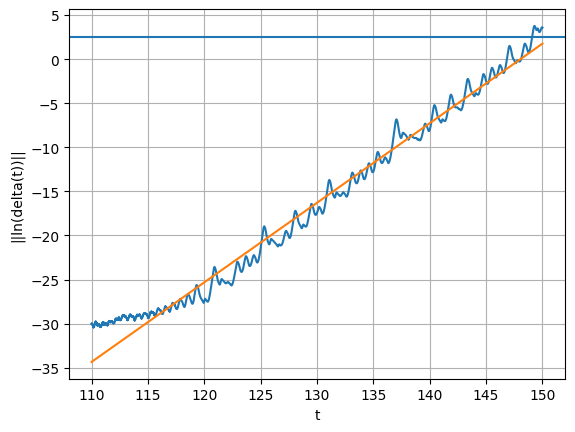

In [ ]:
slope1, intercept1, r1, p1, std_err1 = stats.linregress(t[tercero : valoritermax], deltaln[tercero : valoritermax])
print('La pendiente es:',slope1)
print('La ordenada en el origen es: ', intercept1, 'que al hacer el logaritmo neperiano sale: ', np.exp(intercept1))
print('La correlación de la regresión: ', r1)
thorizonte=1/slope1*np.log(10**(-14)/perturbacion)
print(thorizonte)
x=np.linspace(110,150,1000)
plt.plot(t[10000 : 50000], deltaln[10000 : 50000])
plt.plot(x,slope1*x+intercept1)
plt.axhline(thorizonte)
plt.xlabel('t')
plt.ylabel('||ln(delta(t))||')
plt.grid(True)
plt.show()


Como comprabamos el resultado se aleja de 0.9 no por mucho 0.02. Esto es debido a que no hemos tomado en consideración que las primeras iteraciones no aportan nada ya que son los puntos donde ambos recorridos son similares.

La pendiente es: 0.9669555310314683
La ordenada en el origen es:  -142.39090376321238 que al hacer el logaritmo neperiano sale:  1.44682572624633e-62
La correlación de la regresión:  0.969599989203023
2.3812729945686733


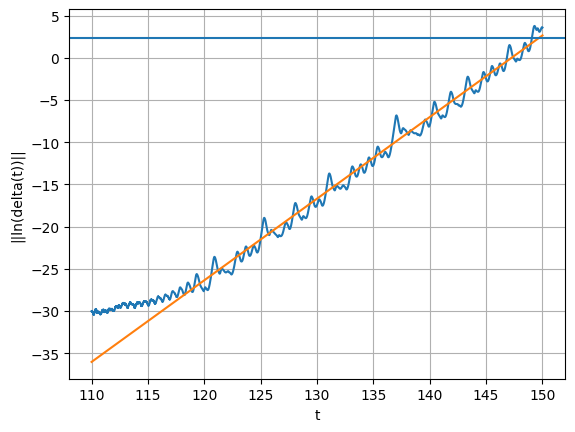

In [ ]:
slope1, intercept1, r1, p1, std_err1 = stats.linregress(t[parada[1] : valoritermax], deltaln[parada[1] : valoritermax])
print('La pendiente es:',slope1)
print('La ordenada en el origen es: ', intercept1, 'que al hacer el logaritmo neperiano sale: ', np.exp(intercept1))
print('La correlación de la regresión: ', r1)
thorizonte=1/slope1*np.log(10**(-14)/perturbacion)
print(thorizonte)
x=np.linspace(110,150,1000)
plt.plot(t[10000 : 50000], deltaln[10000 : 50000])
plt.plot(x,slope1*x+intercept1)
plt.axhline(thorizonte)
plt.xlabel('t')
plt.ylabel('||ln(delta(t))||')
plt.grid(True)
plt.show()

Vemos que la pendiente sale mas cercano al valor esperado, sin embargo la correlación entre ambas variables a disminuido considerablemente. El error del 0.04 que dista del valor esperado, seguramente, sea del valor de la tolerancia a la hora de calcular la parada. Necesitaría calcular el valor óptimo para el cual el error cometido se mínimo. 